In [407]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [409]:
#load the data
test_data=pd.read_csv("Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_test.csv")
train_data=pd.read_csv("Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv")
#Exploratory Datasets
print("Total missing Values in the train dataset:",train_data.isna().sum().sum())
print("Total missing Values in the train dataset:",test_data.isna().sum().sum())
#Handle the missing values in train dataset:
for i in train_data.select_dtypes(include="number").columns:
    train_data=train_data.fillna(value=train_data[i].mean())
print("Total missing values in the train dataset after filling:",train_data.isna().sum().sum())
#Handle the missing values in test dataset:
for i in test_data.select_dtypes(include="number").columns:
    test_data=test_data.fillna(value=test_data[i].mean())
print("Total missing values in the train dataset after filling:",test_data.isna().sum().sum())
#find duplicates in  dataset
print("No.of duplicate in train datasets:",end=" ")
print(train_data.duplicated().sum()) 
print("No.of duplicate in test datasets:",end=" ")
print(test_data.duplicated().sum()) 
print(train_data.info())
print(test_data.info())

Total missing Values in the train dataset: 866
Total missing Values in the train dataset: 414
Total missing values in the train dataset after filling: 0
Total missing values in the train dataset after filling: 0
No.of duplicate in train datasets: 0
No.of duplicate in test datasets: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), in

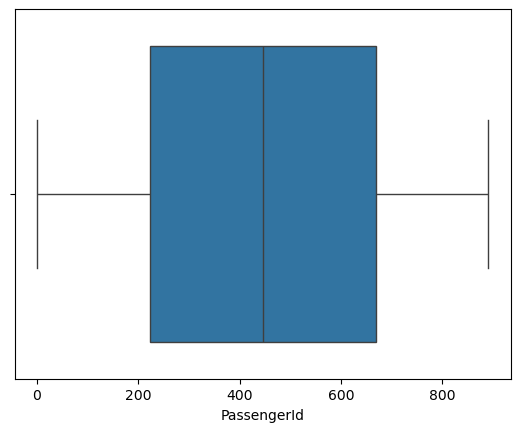

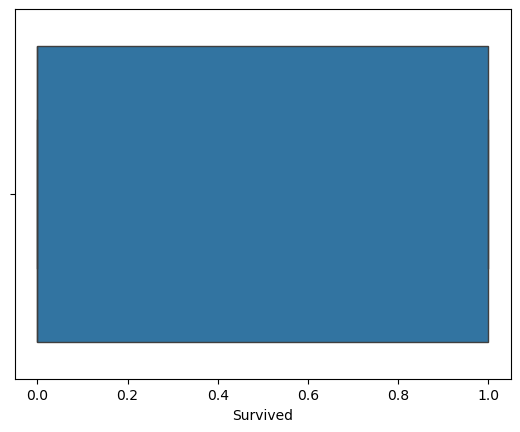

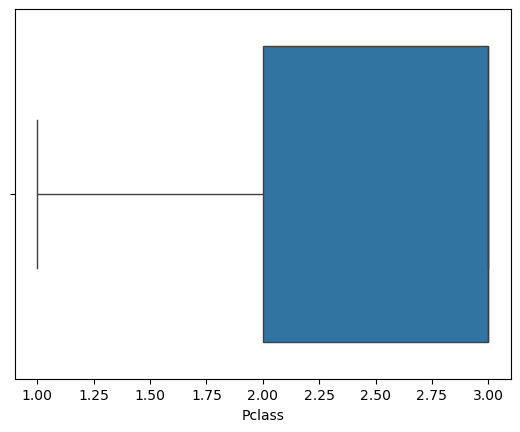

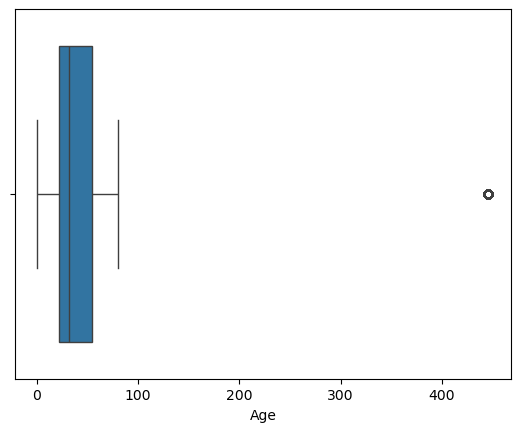

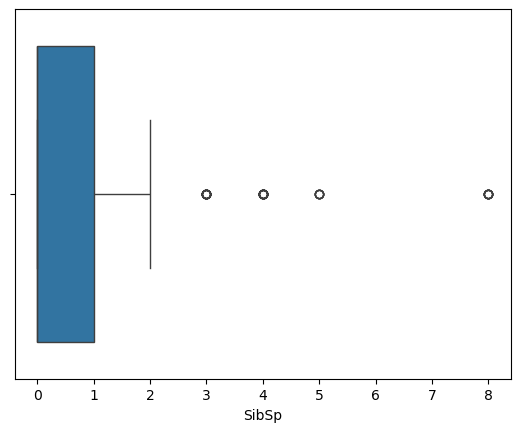

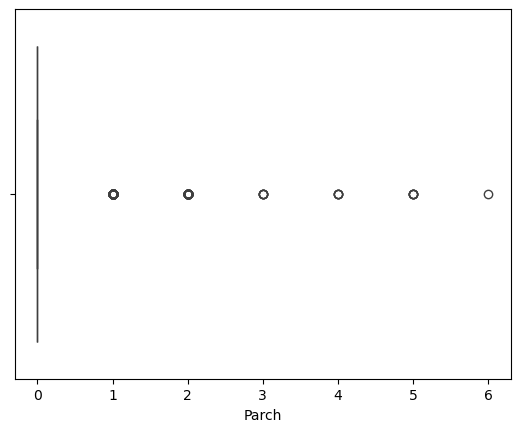

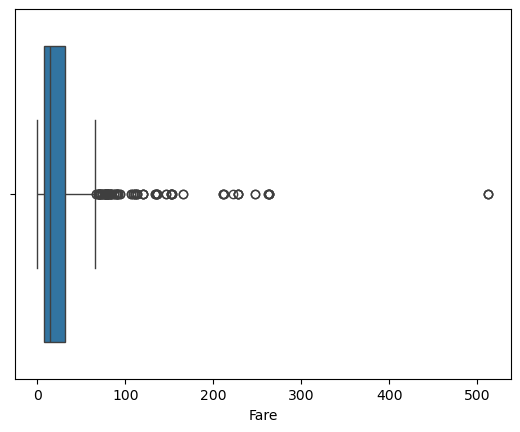

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [411]:
#Find outliers using boxplot for traindata
import matplotlib.pyplot as plt
%matplotlib inline
for i in train_data.select_dtypes(include="number").columns:
    sns.boxplot(data=train_data,x=i)
    plt.show() 
p=train_data.select_dtypes(include="number").columns
print(p)

In [413]:
#Treatment for outliers/boxplot capping for train data
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in train_data.select_dtypes(include="number").columns:
    lower,upper=remove_outlier(train_data[i])
    train_data[i]=np.where(train_data[i]<lower,lower,train_data[i])
    train_data[i]=np.where(train_data[i]>upper,upper,train_data[i])

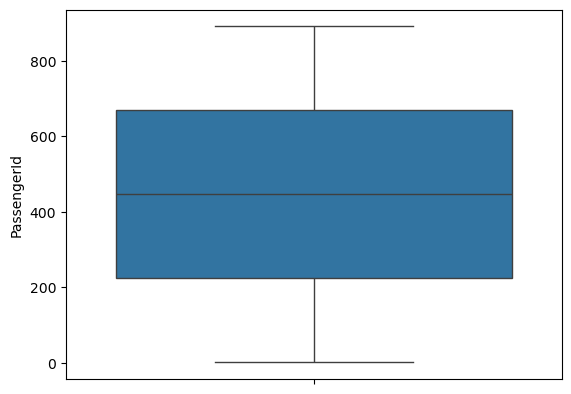

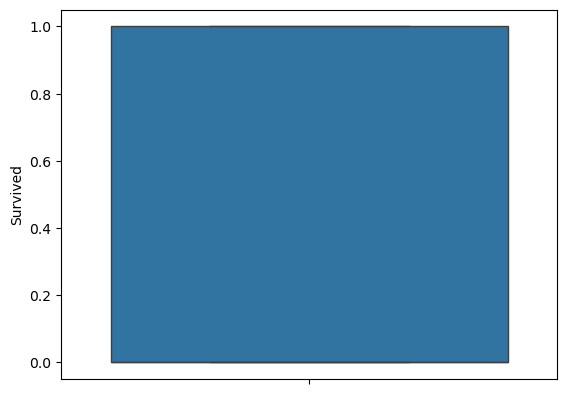

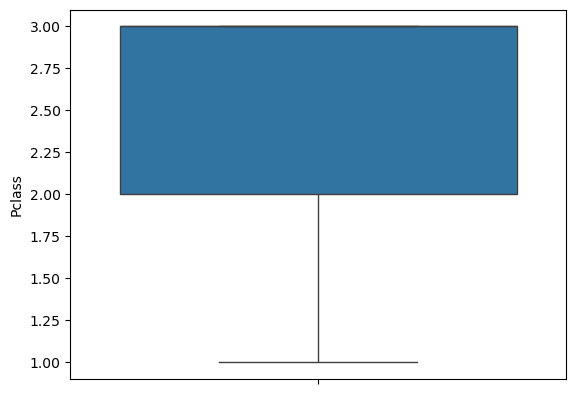

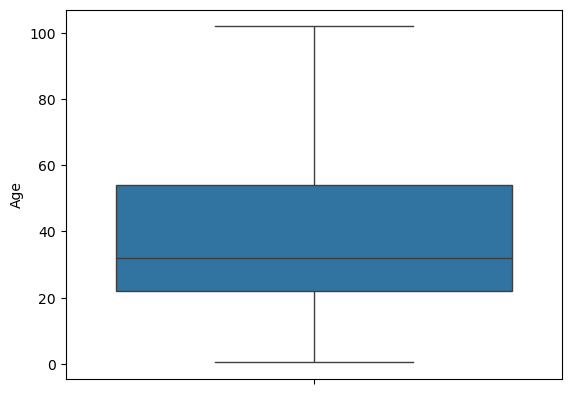

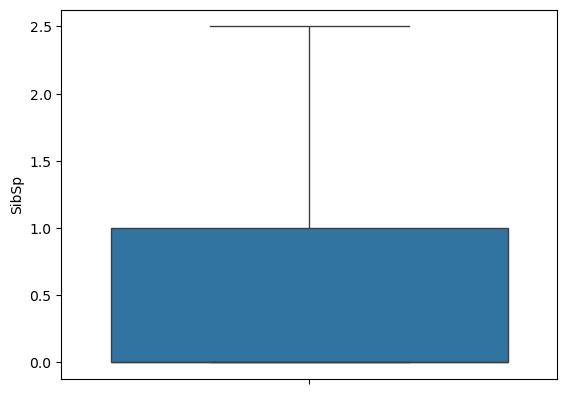

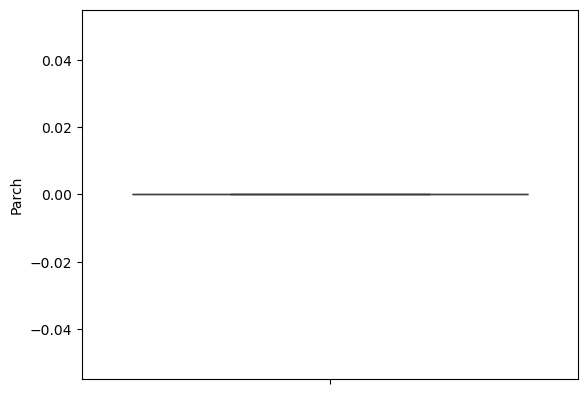

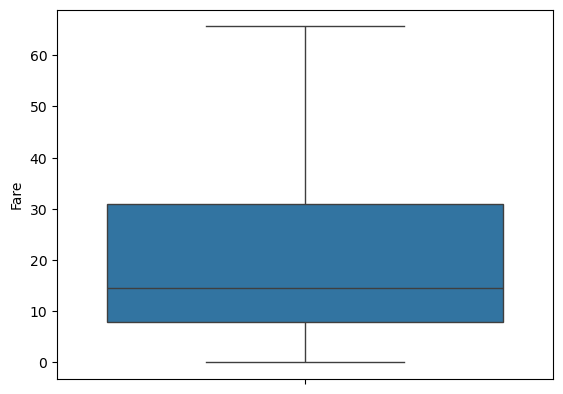

In [307]:
#box plot after capping  train dataset
for i in train_data.select_dtypes(include="number").columns:
    sns.boxplot(train_data[i])
    plt.show()

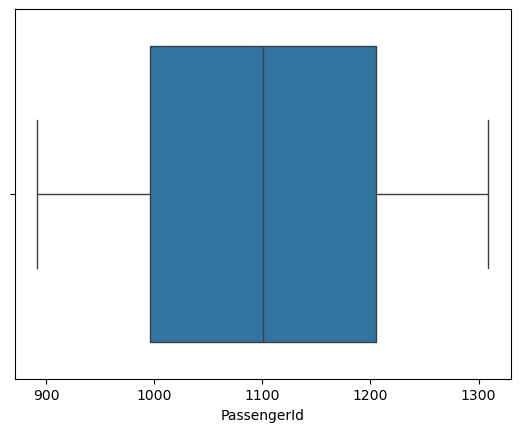

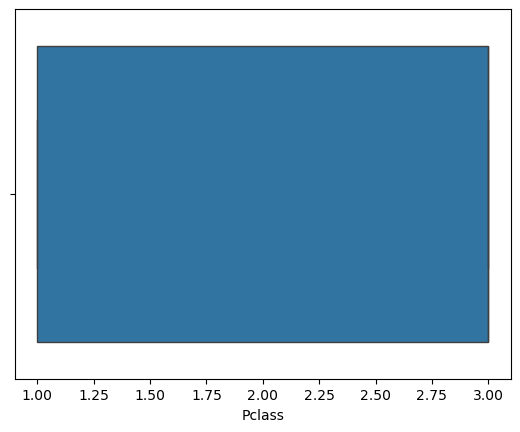

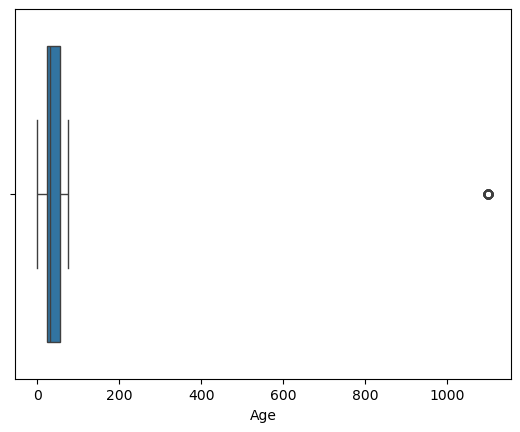

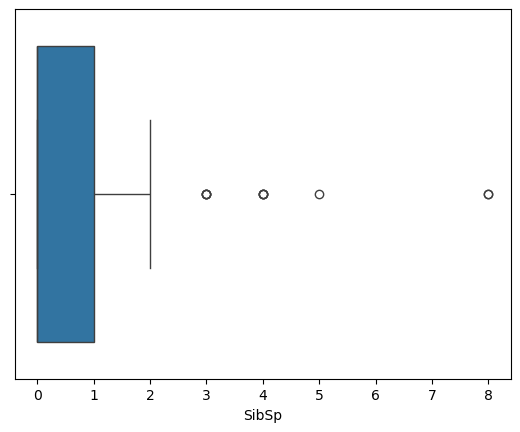

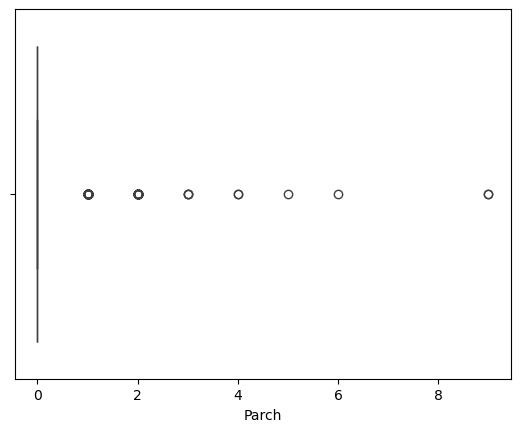

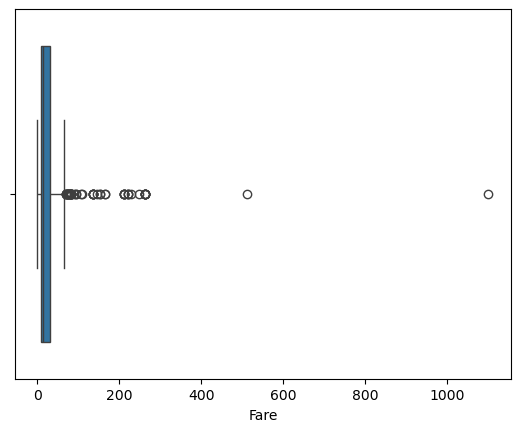

In [415]:
#Find outliers using boxplot for test data
import matplotlib.pyplot as plt
%matplotlib inline
for i in test_data.select_dtypes(include="number").columns:
    sns.boxplot(data=test_data,x=i)
    plt.show() 

In [417]:
#Treatment for outliers/boxplot capping for test data
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in test_data.select_dtypes(include="number").columns:
    lower,upper=remove_outlier(test_data[i])
    test_data[i]=np.where(test_data[i]<lower,lower,test_data[i])
    test_data[i]=np.where(test_data[i]>upper,upper,test_data[i])

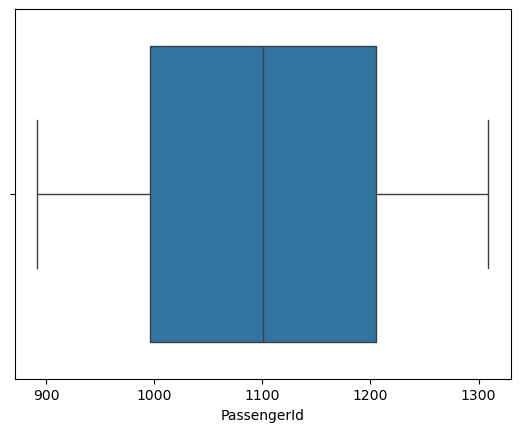

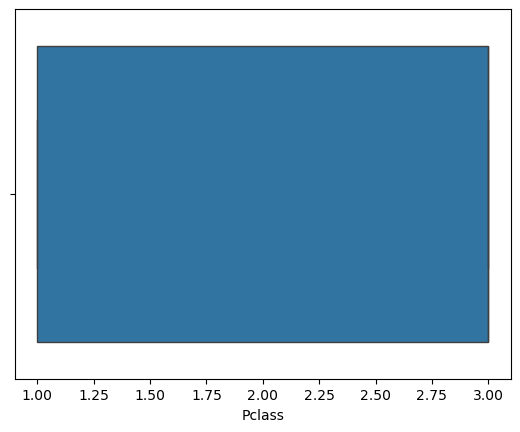

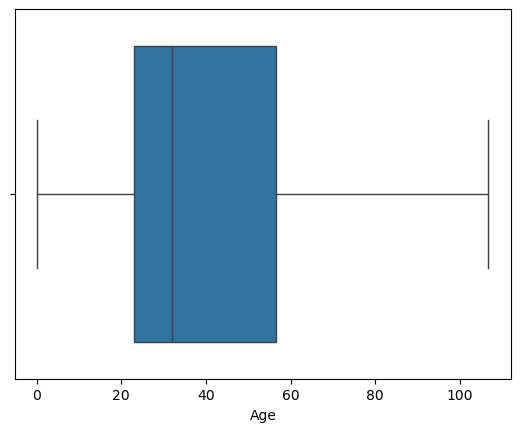

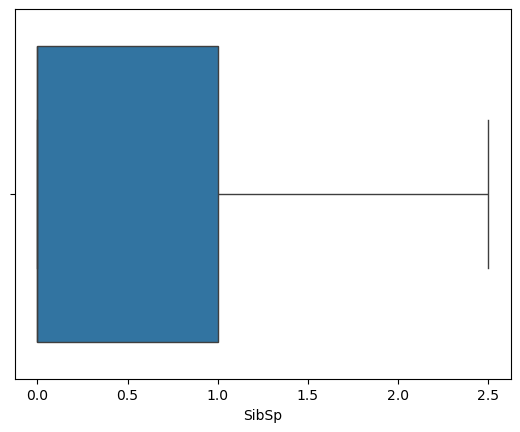

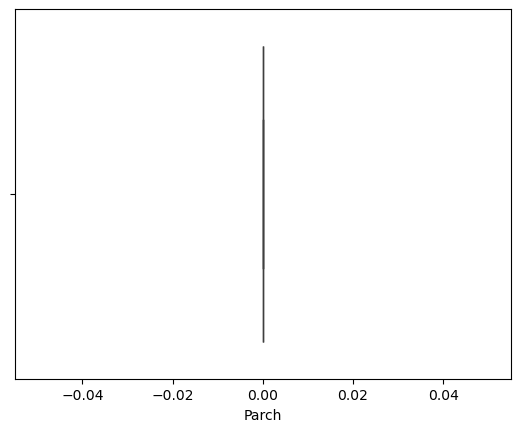

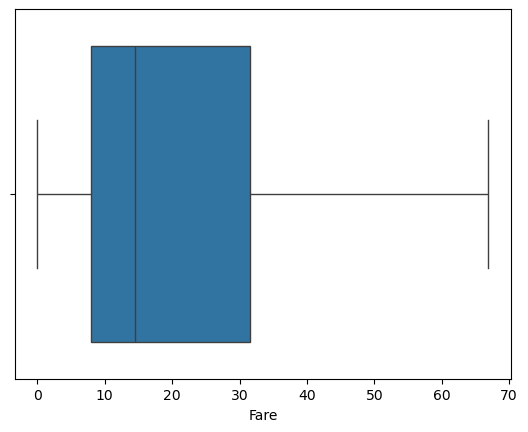

In [313]:
for i in test_data.select_dtypes(include="number").columns:
    sns.boxplot(data=test_data,x=i)
    plt.show()

In [315]:
#summary  for train data
print("The Five summary for  train data:\n")
print(train_data.describe())
#summary data
print("The Five summary for test data:\n")
print(test_data.describe())

The Five summary for  train data:

       PassengerId    Survived      Pclass         Age       SibSp  Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.0   
mean    446.000000    0.383838    2.308642   44.061919    0.426487    0.0   
std     257.353842    0.486592    0.836071   31.656604    0.708246    0.0   
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.0   
25%     223.500000    0.000000    2.000000   22.000000    0.000000    0.0   
50%     446.000000    0.000000    3.000000   32.000000    0.000000    0.0   
75%     668.500000    1.000000    3.000000   54.000000    1.000000    0.0   
max     891.000000    1.000000    3.000000  102.000000    2.500000    0.0   

             Fare  
count  891.000000  
mean    24.046813  
std     20.481625  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max     65.634400  
The Five summary for test data:

       PassengerId      Pclass         Age       SibSp  Pa

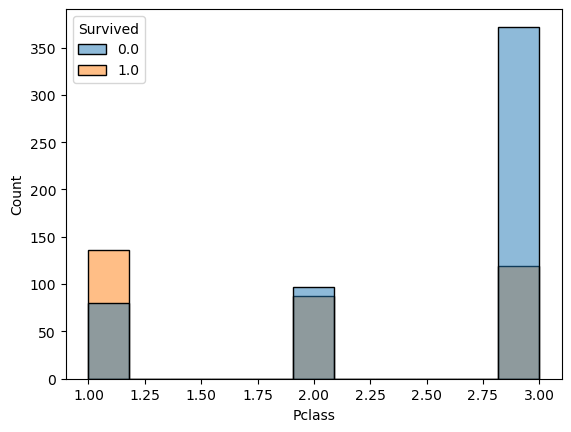

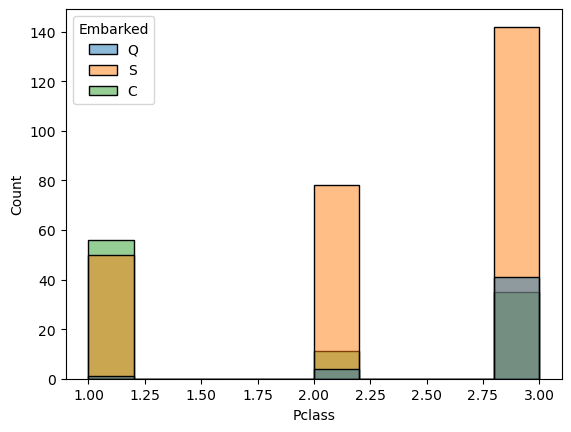

In [317]:
#histogram plot for train data
sns.histplot(x="Pclass",data=train_data,hue="Survived")
plt.show()
sns.histplot(x="Pclass",data=test_data,hue="Embarked")
plt.show()


In [367]:
print(train_data.columns)
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [419]:
#Feature Engineering
#label encoding for categorical data
#convert the categorical variable into numerical variable for train data
train_data["Sex"]=train_data["Sex"].astype('category')
train_data["Sex"]=train_data["Sex"].cat.codes
train_data["Name"]=train_data["Name"].astype('category')
train_data["Name"]=train_data["Name"].cat.codes
train_data["Ticket"]=train_data["Ticket"].astype('category')
train_data["Ticket"]=train_data["Ticket"].cat.codes
train_data["Cabin"]=train_data["Cabin"].astype('category')
train_data["Cabin"]=train_data["Cabin"].cat.codes
train_data["Embarked"]=train_data["Embarked"].astype('category')
train_data["Embarked"]=train_data["Embarked"].cat.codes
print(train_data.dtypes)


PassengerId    float64
Survived       float64
Pclass         float64
Name             int16
Sex               int8
Age            float64
SibSp          float64
Parch          float64
Ticket           int16
Fare           float64
Cabin            int16
Embarked          int8
dtype: object


In [421]:
#Feature Engineering
#label encoding for categorical data
#convert the categorical variable into numerical variable for test data
test_data["Sex"]=test_data["Sex"].astype('category')
test_data["Sex"]=test_data["Sex"].cat.codes
test_data["Name"]=test_data["Name"].astype('category')
test_data["Name"]=test_data["Name"].cat.codes
test_data["Ticket"]=test_data["Ticket"].astype('category')
test_data["Ticket"]=test_data["Ticket"].cat.codes
test_data["Cabin"]=test_data["Cabin"].astype('category')
test_data["Cabin"]=test_data["Cabin"].cat.codes
test_data["Embarked"]=test_data["Embarked"].astype('category')
test_data["Embarked"]=test_data["Embarked"].cat.codes
print(test_data.dtypes)

PassengerId    float64
Pclass         float64
Name             int16
Sex               int8
Age            float64
SibSp          float64
Parch          float64
Ticket           int16
Fare           float64
Cabin             int8
Embarked          int8
dtype: object


In [423]:
#Build and validate model
x=train_data.drop(columns=["Sex","PassengerId"])
y=train_data["Sex"]
x1=test_data.drop(columns="Sex")
y1=test_data["Sex"]
feature_name=x.columns

In [425]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)
x_scale[:3]

array([[-0.78927234,  0.82737724, -1.31021659, -0.69730506,  0.81022003,
         0.        ,  0.91896631, -0.82055245, -0.4624902 ,  0.58796609],
       [ 1.2669898 , -1.56610693, -0.99141018, -0.19159743,  0.81022003,
         0.        ,  1.28262456,  2.03162322,  1.6886722 , -1.91264387],
       [ 1.2669898 ,  0.82737724, -0.35768524, -0.57087815, -0.60251196,
         0.        ,  1.64628282, -0.78757757, -0.4624902 ,  0.58796609]])

In [427]:
#build model Light GBM
import lightgbm as lgb
d_train=lgb.Dataset(x_scale,label=y)
d_test=lgb.Dataset(x1,label=y1)
lgb_param={"learning_rate":0.05,"boosting_type":"gbdt","objective":"regression","feature_names":"x.columns",
           "is_unbalance":"true","feature_fraction":0.5,"bagging_fraction":0.5,"num_leaves":10,
           "bagging_freq":20,"metric":{"l2","l1"},"verbose":-1}


In [429]:
model_lgbm=lgb.train(lgb_param,d_train,valid_sets=d_test)

In [431]:
y_pred=model_lgbm.predict(x1)

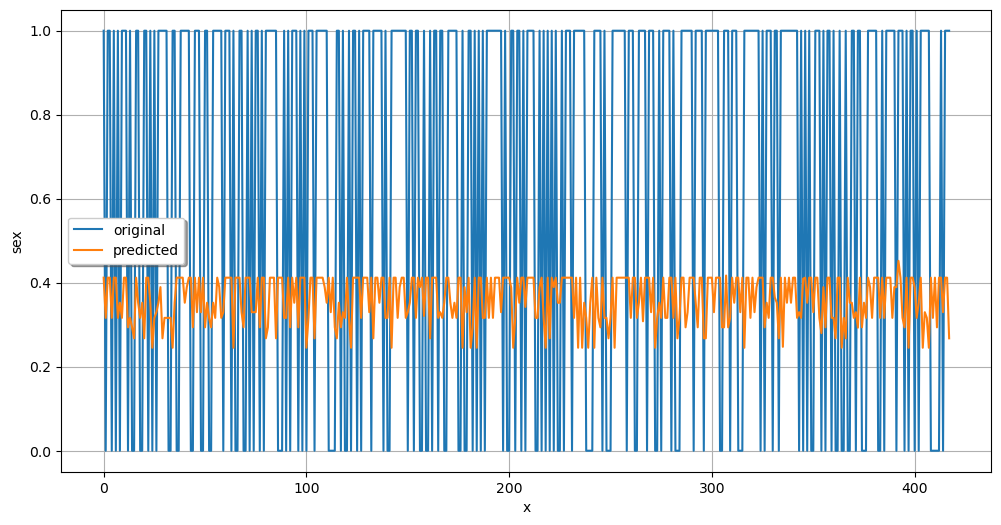

In [383]:
#visualizing in a plot
x_ax=range(len(y1))
plt.figure(figsize=(12,6))
plt.plot(x_ax,y1,label="original")
plt.plot(x_ax,y_pred,label="predicted")
plt.xlabel("x")
plt.ylabel("sex")
plt.legend(loc="best",fancybox=True,shadow=True)
plt.grid(True)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

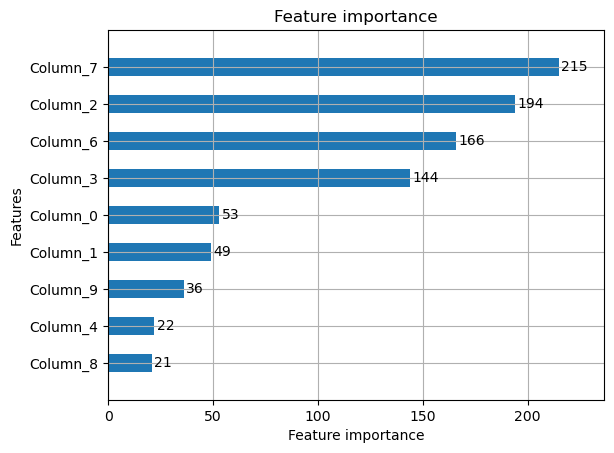

In [385]:
#Feature Impoortances
lgb.plot_importance(model_lgbm,height=.5)

In [387]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [389]:
xt=train_data.drop(columns=["Sex","PassengerId"])
yt=train_data["Sex"]
x2=test_data.drop(columns="Sex")
y2=test_data["Sex"]
feature_name=x.columns

In [391]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(xt)
x_scale[:3]

array([[-0.78927234,  0.82737724, -1.31021659, -0.69730506,  0.81022003,
         0.        ,  0.91896631, -0.82055245, -0.4624902 ,  0.58796609],
       [ 1.2669898 , -1.56610693, -0.99141018, -0.19159743,  0.81022003,
         0.        ,  1.28262456,  2.03162322,  1.6886722 , -1.91264387],
       [ 1.2669898 ,  0.82737724, -0.35768524, -0.57087815, -0.60251196,
         0.        ,  1.64628282, -0.78757757, -0.4624902 ,  0.58796609]])

In [393]:
xgbr=XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [395]:
xgbr.fit(x_scale,yt)
score=xgbr.score(x_scale,yt)
print("Training score:",score)

Training score: 0.9787293918757642


In [397]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(xgbr,x_scale,yt,cv=10)
print("CV mean Score:",cv_score.mean())

CV mean Score: 0.2563685695421519


In [405]:
y_pred1=xgbr.predict(x2)

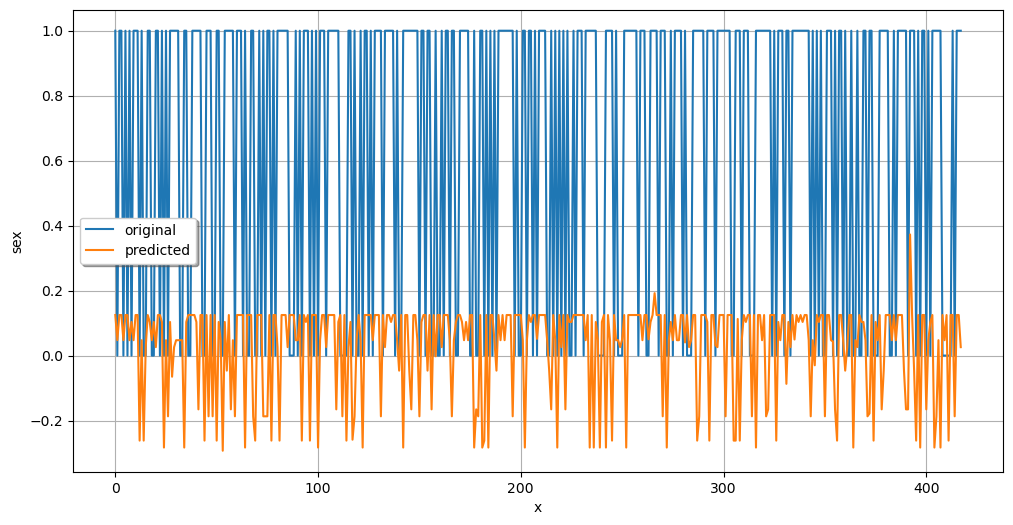

In [403]:
#visualizing in a plot
x_ax=range(len(y2))
plt.figure(figsize=(12,6))
plt.plot(x_ax,y2,label="original")
plt.plot(x_ax,y_pred1,label="predicted")
plt.xlabel("x")
plt.ylabel("sex")
plt.legend(loc="best",fancybox=True,shadow=True)
plt.grid(True)
plt.show()